# Clasificación Básica: Predecir una imagen de moda

Entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [19]:
fashion_mnist = keras.datasets.fashion_mnist

In [20]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [21]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta.

# Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?#

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [23]:
len(np.unique(y_test))

10

In [24]:
len(np.unique(y_train))

10

In [25]:
len(np.unique(X_train))

256

In [26]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [27]:
# Información sobre el conjunto de datos
print(f"Cantidad de imágenes en entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de imágenes en prueba: {X_test.shape[0]}")
print(f"Dimensiones de cada imagen (píxeles): {X_train.shape[1:]}")
print(f"Valores únicos de las etiquetas: {set(y_train)}")

Cantidad de imágenes en entrenamiento: 60000
Cantidad de imágenes en prueba: 10000
Dimensiones de cada imagen (píxeles): (28, 28)
Valores únicos de las etiquetas: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

C:\Users\mikel\AppData\Local\Temp\ipykernel_17624\156772231.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('gray'));


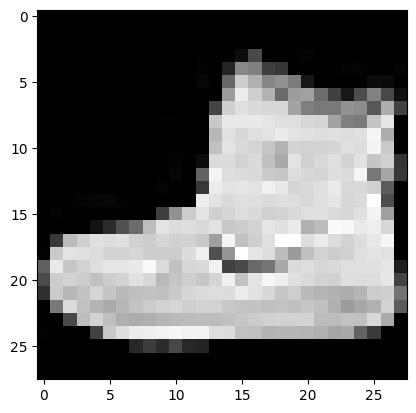

In [28]:
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('gray'));

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [29]:
28*28

784

In [30]:
X_train = X_train.astype("float32")/784
X_test = X_test.astype("float32")/784

In [31]:
np.max(X_train)

np.float32(0.3252551)

In [32]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [34]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [35]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [36]:
'''
# Escalar los conjuntos de entrenamiento y prueba para que estén en el rango [0, 1]
def scale_data(data):
    return data / 255.0

# Escalar los datos
X_train_scaled = scale_data(X_train)
X_test_scaled = scale_data(X_test)

# Verificar el rango
print(f"Rango de X_train_scaled: {X_train_scaled.min()} a {X_train_scaled.max()}")
print(f"Rango de X_test_scaled: {X_test_scaled.min()} a {X_test_scaled.max()}")
'''

'\n# Escalar los conjuntos de entrenamiento y prueba para que estén en el rango [0, 1]\ndef scale_data(data):\n    return data / 255.0\n\n# Escalar los datos\nX_train_scaled = scale_data(X_train)\nX_test_scaled = scale_data(X_test)\n\n# Verificar el rango\nprint(f"Rango de X_train_scaled: {X_train_scaled.min()} a {X_train_scaled.max()}")\nprint(f"Rango de X_test_scaled: {X_test_scaled.min()} a {X_test_scaled.max()}")\n'

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [37]:
28*28

784

In [38]:
X_train.shape

(50000, 28, 28)

In [39]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
print(model.layers[0])

<Flatten name=flatten, built=True>


In [41]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [42]:
weights

array([[ 0.05287156, -0.06144552, -0.03694048, ..., -0.07416958,
        -0.03489006,  0.00815447],
       [-0.03446789, -0.04195242,  0.00924844, ..., -0.05632962,
        -0.03548555, -0.02844664],
       [-0.03911268, -0.04301839, -0.02888879, ..., -0.03571176,
        -0.06232369, -0.01440179],
       ...,
       [ 0.02958894, -0.01612948,  0.00934629, ...,  0.06850877,
        -0.05595519,  0.06780399],
       [-0.0682363 , -0.00297678,  0.01267465, ..., -0.0723336 ,
        -0.06888024, -0.03330828],
       [ 0.02643387, -0.00089622,  0.00477645, ..., -0.03007031,
         0.0117915 , -0.0362878 ]], dtype=float32)

In [43]:
len(weights)

784

In [44]:
len(weights[0])

300

In [45]:
weights.size

235200

In [46]:
len(biases)

300

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [47]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [48]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [49]:
X_train.shape

(50000, 28, 28)

In [50]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0863 - sparse_categorical_accuracy: 0.3186 - val_loss: 1.3640 - val_sparse_categorical_accuracy: 0.6468
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2183 - sparse_categorical_accuracy: 0.6708 - val_loss: 0.9297 - val_sparse_categorical_accuracy: 0.7223
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8836 - sparse_categorical_accuracy: 0.7330 - val_loss: 0.7771 - val_sparse_categorical_accuracy: 0.7553
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7578 - sparse_categorical_accuracy: 0.7570 - val_loss: 0.6972 - val_sparse_categorical_accuracy: 0.7680
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6920 - sparse_categorical_accuracy: 0.7694 - val_loss: 0.6496 - val_sparse_categorical_accuracy: 0.7770
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6323 - sparse_categorical_accuracy: 0.7831 - val_loss: 0.6154 - val_sparse_categorical_accuracy: 0.7837
Epoch 7/50
391/

In [51]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'loss': [1.8439435958862305, 1.1064624786376953, 0.847211480140686, 0.7363178133964539, 0.6726563572883606, 0.6299658417701721, 0.5996123552322388, 0.5756412148475647, 0.5563204884529114, 0.5407904982566833, 0.5273799896240234, 0.5156036019325256, 0.505501925945282, 0.4969922602176666, 0.4891205132007599, 0.48198574781417847, 0.47589555382728577, 0.47033190727233887, 0.4655477702617645, 0.4604683518409729, 0.4560774862766266, 0.45171141624450684, 0.44770196080207825, 0.4443746507167816, 0.44050905108451843, 0.4370655119419098, 0.4339641034603119, 0.43071186542510986, 0.4279356300830841, 0.4251191318035126, 0.4227372407913208, 0.4199207127094269, 0.41702499985694885, 0.41532042622566223, 0.4127233326435089, 0.40992897748947144, 0.40785160660743713, 0.4061085879802704, 0.40366360545158386, 0.4015257954597473, 0.399635910987854, 0.3978615701198578, 0.3959835171699524, 0.3938019871711731, 0.3918226659297943, 0.3899548351764679, 0.3881669044494629, 0.3865959644317627, 0.38460057973861694, 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

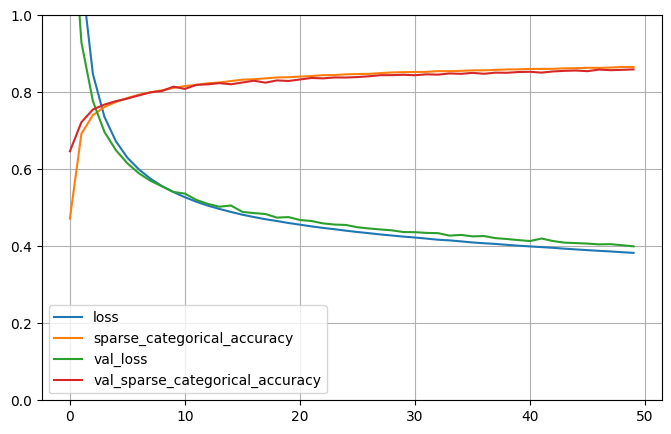

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [53]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
(1, 10)


array([[4.6174296e-06, 2.0051382e-07, 5.0529234e-06, 3.3346989e-06,
        4.4268941e-06, 8.5304052e-02, 1.2468748e-05, 1.4358817e-01,
        1.8244367e-03, 7.6925325e-01]], dtype=float32)

In [54]:
predictions.argmax()

np.int64(9)

In [64]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba).

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[823,   2,  16,  50,   3,   1,  92,   0,  13,   0],
       [  3, 952,   6,  30,   5,   0,   3,   0,   1,   0],
       [ 19,   2, 769,   9, 129,   1,  61,   0,  10,   0],
       [ 31,  10,  14, 876,  32,   0,  31,   0,   6,   0],
       [  1,   1, 113,  32, 768,   0,  78,   0,   7,   0],
       [  0,   0,   0,   1,   0, 928,   0,  47,   2,  22],
       [156,   1, 132,  38,  99,   0, 545,   0,  29,   0],
       [  0,   0,   0,   0,   0,  31,   0, 924,   0,  45],
       [  1,   1,  14,   8,   3,   4,  12,   5, 952,   0],
       [  0,   0,   0,   0,   0,  18,   0,  40,   1, 941]])

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

C:\Users\mikel\AppData\Local\Temp\ipykernel_17624\2156923697.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


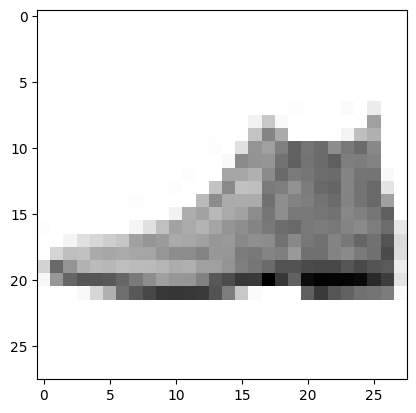

In [62]:
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

Evalúa tu modelo con una matriz de confusión e interprétala.

In [66]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[823,   2,  16,  50,   3,   1,  92,   0,  13,   0],
       [  3, 952,   6,  30,   5,   0,   3,   0,   1,   0],
       [ 19,   2, 769,   9, 129,   1,  61,   0,  10,   0],
       [ 31,  10,  14, 876,  32,   0,  31,   0,   6,   0],
       [  1,   1, 113,  32, 768,   0,  78,   0,   7,   0],
       [  0,   0,   0,   1,   0, 928,   0,  47,   2,  22],
       [156,   1, 132,  38,  99,   0, 545,   0,  29,   0],
       [  0,   0,   0,   0,   0,  31,   0, 924,   0,  45],
       [  1,   1,  14,   8,   3,   4,  12,   5, 952,   0],
       [  0,   0,   0,   0,   0,  18,   0,  40,   1, 941]])

### Interpretación de la Matriz de Confusión

#### Estructura
- **Filas**: Etiquetas reales (verdaderas).
- **Columnas**: Etiquetas predichas.
- **Diagonal principal**: Predicciones correctas.
- **Fuera de la diagonal**: Errores de clasificación.

#### Análisis
1. **Clase 0**:
   - Correctas: 823.
   - Errores: 50 como clase 3, 16 como clase 2, etc.
2. **Clase 1**:
   - Correctas: 952.
   - Errores: 30 como clase 3, 6 como clase 2, etc.
3. **Clase 6**:
   - Correctas: 545.
   - Errores: 156 como clase 0, 132 como clase 2, etc.

#### Evaluación
- **Buen desempeño general**: Mayoría de valores en la diagonal principal.
- **Errores significativos**: Confusiones entre clases 6 y 0, y 6 y 2.



Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [67]:
# Seleccionar una imagen del conjunto de prueba
image_to_predict = X_test[0]  # Cambia el índice para probar otra imagen

# Añadir una dimensión para que el modelo acepte la entrada (debe ser [1, 28, 28])
image_to_predict = image_to_predict.reshape(1, 28, 28)

# Realizar la predicción
single_prediction = model.predict(image_to_predict)

# Obtener la etiqueta predicha
predicted_label = single_prediction.argmax()

print(f"Etiqueta predicha: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Etiqueta predicha: 9


In [68]:
print(f"Etiqueta real: {y_test[0]}")


Etiqueta real: 9.0
